## Analyze ZSCG results

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**1. Untarget attack on MNIST with** $L_{\infty}$

In [75]:
BASE_PATH = 'classic_mnist_untarget_'

df05 = pd.read_csv('{}05.csv'.format(BASE_PATH), index_col = 0)
df10 = pd.read_csv('{}10.csv'.format(BASE_PATH), index_col = 0)
df15 = pd.read_csv('{}15.csv'.format(BASE_PATH), index_col = 0)
df20 = pd.read_csv('{}20.csv'.format(BASE_PATH), index_col = 0).iloc[-6:, :]
df25 = pd.read_csv('{}25.csv'.format(BASE_PATH), index_col = 0)
df25

,Succes Rate,Time per attack,# Gradient Estimation,Alpha,Gaussian Smoothing
0,0.94,0.209885,500,0.2,0.001
1,0.98,0.209364,1000,0.2,0.001
2,0.99,0.261046,2000,0.2,0.001
3,1.00,0.390994,4000,0.2,0.001
4,1.00,0.513397,8000,0.2,0.001
5,1.00,0.826656,16000,0.2,0.001


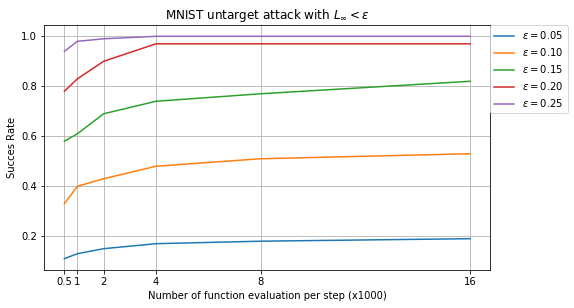

In [157]:
fig = plt.figure(figsize=(8, 4.5))
plt.title('MNIST untarget attack with $L_{\infty} < \epsilon$')
plt.plot(df05['# Gradient Estimation'], df05['Succes Rate'], label=r'$\epsilon = 0.05$')
plt.plot(df10['# Gradient Estimation'], df10['Succes Rate'], label=r'$\epsilon = 0.10$')
plt.plot(df15['# Gradient Estimation'], df15['Succes Rate'], label=r'$\epsilon = 0.15$')
plt.plot(df20['# Gradient Estimation'], df20['Succes Rate'], label=r'$\epsilon = 0.20$')
plt.plot(df25['# Gradient Estimation'], df25['Succes Rate'], label=r'$\epsilon = 0.25$')
plt.ylabel('Succes Rate')
plt.xlabel('Number of function evaluation per step (x1000)')
plt.xticks( [500, 1000, 2000, 4000, 8000, 16000], [0.5, 1, 2, 4, 8, 16], rotation=0)
plt.legend(loc=[1, 0.64])
plt.grid()
plt.show()

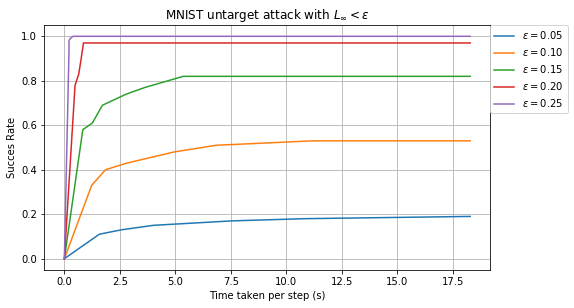

In [155]:
max_time = [df05['Time per attack'].max()]

def SR(df):
    return [0] + df['Succes Rate'].tolist() + [df['Succes Rate'].max()]
def max_SR(df):
    return df['Succes Rate'].tolist()  + [df['Succes Rate'].max()]




fig = plt.figure(figsize=(8, 4.5))
plt.title('MNIST untarget attack with $L_{\infty} < \epsilon$')
plt.plot([0] + df05['Time per attack'].tolist() + max_time, SR(df05), label=r'$\epsilon = 0.05$')
plt.plot([0] + df10['Time per attack'].tolist() + max_time, SR(df10), label=r'$\epsilon = 0.10$')
plt.plot([0] + df15['Time per attack'].tolist() + max_time, SR(df15), label=r'$\epsilon = 0.15$')
plt.plot([0] + df20['Time per attack'].tolist() + max_time, SR(df20), label=r'$\epsilon = 0.20$')
plt.plot([0] + df25['Time per attack'].tolist() + max_time, SR(df25), label=r'$\epsilon = 0.25$')
plt.ylabel('Succes Rate')
plt.xlabel('Time taken per step (s)')
plt.legend(loc=[1, 0.64])
plt.grid()
plt.show()

**2. Target attack on MNIST with** $L_{\infty}$

In [158]:
BASE_PATH = 'classic_mnist_target_'

dft50 = pd.read_csv('{}50.csv'.format(BASE_PATH), index_col = 0).iloc[:-1, :]
dft40 = pd.read_csv('{}40.csv'.format(BASE_PATH), index_col = 0)
dft30 = pd.read_csv('{}30.csv'.format(BASE_PATH), index_col = 0).iloc[:-1, :]
dft20 = pd.read_csv('{}20.csv'.format(BASE_PATH), index_col = 0)
dft10 = pd.read_csv('{}10.csv'.format(BASE_PATH), index_col = 0).iloc[:-1, :]
dft10

,Succes Rate,Time per attack,# Gradient Estimation,Alpha,Gaussian Smoothing
0,0.072222,1.643592,500,0.2,0.001
1,0.083333,2.735554,1000,0.2,0.001
2,0.094444,4.331026,2000,0.2,0.001
3,0.100000,8.229841,4000,0.2,0.001
4,0.100000,11.939104,8000,0.2,0.001


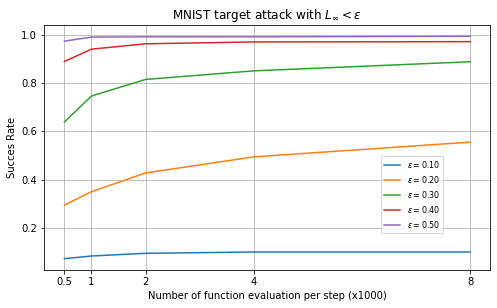

In [133]:
fig = plt.figure(figsize=(8, 4.5))
plt.title('MNIST target attack with $L_{\infty} < \epsilon$')
plt.plot(dft10['# Gradient Estimation'], dft10['Succes Rate'], label=r'$\epsilon = 0.10$')
plt.plot(dft20['# Gradient Estimation'], dft20['Succes Rate'], label=r'$\epsilon = 0.20$')
plt.plot(dft30['# Gradient Estimation'], dft30['Succes Rate'], label=r'$\epsilon = 0.30$')
plt.plot(dft40['# Gradient Estimation'], dft40['Succes Rate'], label=r'$\epsilon = 0.40$')
plt.plot(dft50['# Gradient Estimation'], dft50['Succes Rate'], label=r'$\epsilon = 0.50$')
plt.ylabel('Succes Rate')
plt.xlabel('Number of function evaluation per step (x1000)')
plt.xticks( [500, 1000, 2000, 4000, 8000], [0.5, 1, 2, 4, 8], rotation=0)
plt.legend(loc=[0.755, 0.15], prop={'size': 8})
plt.grid()
plt.show()

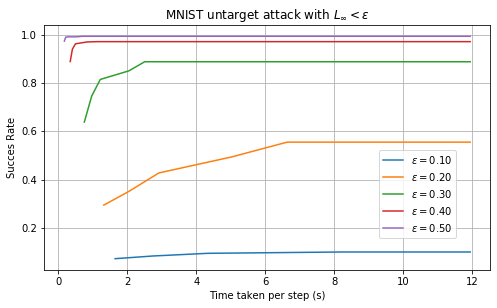

In [141]:
max_time = [dft10['Time per attack'].max()]
def max_SR(df):
    return df['Succes Rate'].tolist()  + [df['Succes Rate'].max()]


fig = plt.figure(figsize=(8, 4.5))
plt.title('MNIST untarget attack with $L_{\infty} < \epsilon$')
plt.plot(dft10['Time per attack'], dft10['Succes Rate'], label=r'$\epsilon = 0.10$')
plt.plot(dft20['Time per attack'].tolist() + max_time, max_SR(dft20), label=r'$\epsilon = 0.20$')
plt.plot(dft30['Time per attack'].tolist() + max_time, max_SR(dft30), label=r'$\epsilon = 0.30$')
plt.plot(dft40['Time per attack'].tolist() + max_time, max_SR(dft40), label=r'$\epsilon = 0.40$')
plt.plot(dft50['Time per attack'].tolist() + max_time, max_SR(dft50), label=r'$\epsilon = 0.50$')
plt.ylabel('Succes Rate')
plt.xlabel('Time taken per step (s)')
plt.legend(loc = [0.75, 0.13])
plt.grid()
plt.show()